<a href="https://colab.research.google.com/github/laduqueo/Senales_y_Sistemas/blob/main/ejercicios_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Transformada de Laplace

### * Consultar y realizar los ejercicios propuestos en el cuaderno de Colab Convolucion.

link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/1_Convolucion.ipynb

### *  Consultar y realizar los ejercicios propuestos en el cuaderno de Colab Respuesta impulso.

link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/2_Respuesta_Impulso.ipynb

### *  Demuestre si los siguientes sistemas de la forma y = H{x}, son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

* $
y[n] = \frac{x[n]}{3} + 2x[n - 1] - y[n - 1]
$

El sistema $ H\{\cdot\} $ es **lineal** si cumple el **principio de superposición**:

**Si**:

$x[n] = a_1 x_1[n] + a_2 x_2[n]$

Entonces debe cumplirse que:

$y[n] = H\{x[n]\} = a_1 H\{x_1[n]\} + a_2 H\{x_2[n]\}$


Sea:

$y_1[n] = H\{x_1[n]\} = \frac{1}{3}x_1[n] + 2x_1[n-1] - y_1[n-1]$

$y_2[n] = H\{x_2[n]\} = \frac{1}{3}x_2[n] + 2x_2[n-1] - y_2[n-1]$

Ahora definimos:

$x[n] = a_1 x_1[n] + a_2 x_2[n]$

Sustituimos en la ecuación del sistema:

$y[n] = \frac{1}{3}(a_1 x_1[n] + a_2 x_2[n]) + 2(a_1 x_1[n-1] + a_2 x_2[n-1]) - y[n-1]$

el último término no se puede separar en:

$-y[n-1] \neq -a_1 y_1[n-1] - a_2 y_2[n-1]$

Entonces **no se cumple** el principio de superposición por culpa del término **recursivo** $y[n-1]$

El sistema **NO es lineal**.

---

¿Es invariante en el tiempo?

Definición: Un sistema es **invariante en el tiempo** si **desplazar la entrada** desplaza la salida de igual forma:

**Si**:

$x[n] \rightarrow x[n - n_0]
\quad \Rightarrow \quad
y[n] \rightarrow y[n - n_0]$


Probamos esto aplicando un retardo en la entrada:

$x_1[n] = x[n - n_0] \quad \Rightarrow \quad
y_1[n] = \frac{1}{3}x[n - n_0] + 2x[n - n_0 - 1] - y_1[n - 1]
$

Comparemos con:

$y[n - n_0] = \frac{1}{3}x[n - n_0] + 2x[n - n_0 - 1] - y[n - n_0 - 1]$

El sistema **sí es invariante en el tiempo**.


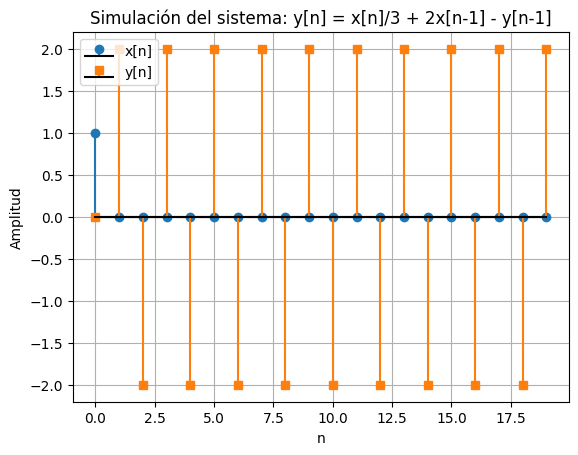

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Señal de entrada x[n]
n = np.arange(0, 20)
x = np.zeros_like(n)
x[0] = 1  # impulso unitario

# Salida y[n]
y = np.zeros_like(n, dtype=float)

# Aplicar la ecuación: y[n] = x[n]/3 + 2x[n-1] - y[n-1]
for i in range(1, len(n)):
    y[i] = (1/3)*x[i] + 2*x[i-1] - y[i-1]

# Graficar
plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='k', label='x[n]')
plt.stem(n, y, linefmt='C1-', markerfmt='C1s', basefmt='k', label='y[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Simulación del sistema: y[n] = x[n]/3 + 2x[n-1] - y[n-1]')
plt.grid(True)
plt.legend()
plt.show()


* $y[n] = \sum_{k=-\infty}^{n} x^2[k]$

Verificación de Linealidad

Entrada:

$$
x[n] = a_1 x_1[n] + a_2 x_2[n]
$$

Salida:

$$
y[n] = \sum_{k=-\infty}^{n} \left( a_1 x_1[k] + a_2 x_2[k] \right)^2
$$


$$
\left( a_1 x_1[k] + a_2 x_2[k] \right)^2 =
a_1^2 x_1^2[k] + 2a_1 a_2 x_1[k] x_2[k] + a_2^2 x_2^2[k]
$$

Entonces:

$$
y[n] = \sum_{k=-\infty}^{n} \left( a_1^2 x_1^2[k] + 2a_1 a_2 x_1[k] x_2[k] + a_2^2 x_2^2[k] \right)
$$

Esta suma **no es igual** a:

$$
a_1 \sum_{k=-\infty}^{n} x_1^2[k] + a_2 \sum_{k=-\infty}^{n} x_2^2[k] = a_1 y_1[n] + a_2 y_2[n]
$$

 **El sistema NO es lineal**, porque aparece un **término cruzado** $$2a_1 a_2 x_1[k] x_2[k]$$ que impide aplicar el principio de superposición.

---
¿Es Invariante en el Tiempo?

Queremos verificar si al desplazar la entrada, la salida también se desplaza de igual forma.

Entrada desplazada:

$$
x_1[n] = x[n - n_0]
$$

Evaluamos la salida con la entrada desplazada:

$$
y_1[n] = \sum_{k=-\infty}^{n} x^2[k - n_0]
$$

Hacemos el cambio de variable $$m = k - n_0$$, entonces $$k = m + n_0$$, y el nuevo límite superior es $$m = n - n_0$$:

$$
y_1[n] = \sum_{m=-\infty}^{n - n_0} x^2[m]
$$

Entonces:

$$
y_1[n] = y[n - n_0]
$$

**El sistema sí es invariante en el tiempo**, ya que desplazar la entrada produce el mismo desplazamiento en la salida.


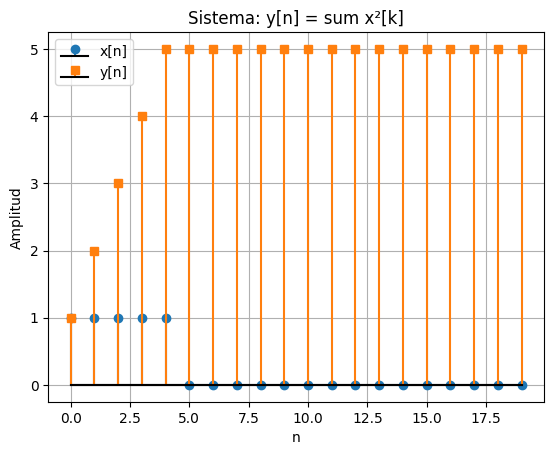

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir señal x[n]
n = np.arange(0, 20)
x = np.ones_like(n)  # por ejemplo, una señal constante
x[5:] = 0            # puede simular un pulso

# Calcular y[n] = sum_{k=-inf}^n x^2[k]
y = np.cumsum(x**2)  # acumulado de cuadrados

# Graficar
plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='k', label='x[n]')
plt.stem(n, y, linefmt='C1-', markerfmt='C1s', basefmt='k', label='y[n]')
plt.title('Sistema: y[n] = sum x²[k]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

* median $(x[n])$ ; donde median es la funcion mediana sobre una ventana de tamano 3.

¿Es lineal?

Es **lineal** si cumple:

$$
H\{a_1 x_1[n] + a_2 x_2[n]\} = a_1 H\{x_1[n]\} + a_2 H\{x_2[n]\}
$$

Pero la función **mediana** no es lineal. Ejemplo:

Ejemplo:

$$
x_1[n] = [0, 0, 100] \quad \Rightarrow \quad \text{median} = 0
$$

$$
x_2[n] = [100, 0, 0] \quad \Rightarrow \quad \text{median} = 0
$$

Entonces:

$$
y_1 = y_2 = 0 \quad \Rightarrow \quad a_1 y_1 + a_2 y_2 = 0
$$

Pero si combinamos:

$$
x[n] = \frac{1}{2} x_1[n] + \frac{1}{2} x_2[n] = [50, 0, 50] \quad \Rightarrow \quad \text{median} = 50
$$

Y:

$$
H\left\{ \frac{1}{2} x_1 + \frac{1}{2} x_2 \right\} \neq \frac{1}{2} H\{x_1\} + \frac{1}{2} H\{x_2\}
$$


**El sistema NO es lineal**.

---

¿Es invariante en el tiempo?

Si:

$$
x_1[n] = x[n - n_0] \quad \Rightarrow \quad y_1[n] = y[n - n_0]
$$

En este caso **sí se cumple**, porque la salida es:

$$
y[n] = \text{median}(x[n-1], x[n], x[n+1])
$$

Entonces, al desplazar la entrada:

$$
y[n - n_0] = \text{median}(x[n - n_0 - 1], x[n - n_0], x[n - n_0 + 1])
$$

**El sistema SÍ es invariante en el tiempo**.



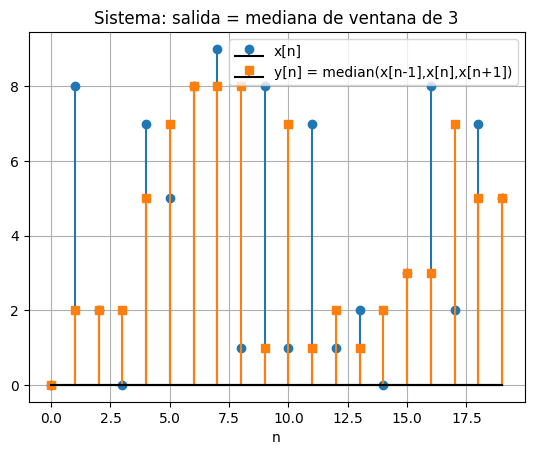

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Crear una señal x[n] (puede tener ruido)
n = np.arange(0, 20)
x = np.random.randint(0, 10, size=len(n))

# Aplicar mediana con ventana de tamaño 3
y = median_filter(x, size=3, mode='nearest')

# Graficar
plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='k', label='x[n]')
plt.stem(n, y, linefmt='C1-', markerfmt='C1s', basefmt='k', label='y[n] = median(x[n-1],x[n],x[n+1])')
plt.title('Sistema: salida = mediana de ventana de 3')
plt.xlabel('n')
plt.grid(True)
plt.legend()
plt.show()

* $
y(t) = A \cdot x(t) + B \quad \text{con} \quad A, B \in \mathbb{R}
$

¿Es lineal?

Para que un sistema sea **lineal**, **no debe haber términos constantes** (que no dependan de la entrada).

La propiedad de **linealidad** dice que:

**Si:**

$$
x(t) = a_1 x_1(t) + a_2 x_2(t)
$$

**Entonces debe cumplirse que:**

$$
H\{x(t)\} = a_1 H\{x_1(t)\} + a_2 H\{x_2(t)\}
$$

Caso 1: Si \( B = 0 \)

Entonces:

$$
y(t) = A \cdot x(t) \quad \Rightarrow \quad H\{x(t)\} = A \cdot x(t)
$$

Verificamos:

$$
H\{a_1 x_1(t) + a_2 x_2(t)\} = A (a_1 x_1 + a_2 x_2) = a_1 A x_1 + a_2 A x_2 = a_1 y_1 + a_2 y_2
$$

**es lineal si** \( B = 0 \).

---

Caso 2: Si \( B \ne 0 \)

Entonces:

$$
y(t) = A \cdot x(t) + B
$$

Pero:

$$
H\{a_1 x_1 + a_2 x_2\} = A(a_1 x_1 + a_2 x_2) + B
$$

Mientras que:

$$
a_1 H\{x_1\} + a_2 H\{x_2\} = a_1 (A x_1 + B) + a_2 (A x_2 + B) = A(a_1 x_1 + a_2 x_2) + (a_1 + a_2) B
$$

Los términos constantes **no coinciden** a menos que:

$$
a_1 + a_2 = 1
$$

**El sistema NO es lineal si** $ B \ne 0 $

---

¿Es invariante en el tiempo?

Para verificar **invariancia en el tiempo**:

**Si:**

$$
x_1(t) = x(t - t_0) \quad \Rightarrow \quad y_1(t) = y(t - t_0)
$$

Entonces:

$$
H\{x(t - t_0)\} = A \cdot x(t - t_0) + B = y(t - t_0)
$$

**sí es invariante en el tiempo**.


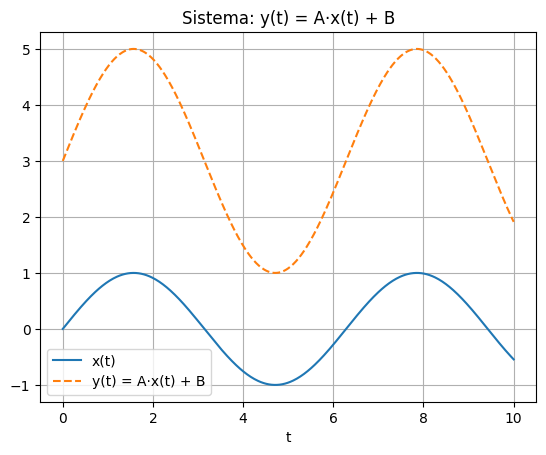

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 2
B = 3

# Señal de entrada
t = np.linspace(0, 10, 500)
x = np.sin(t)

# Salida del sistema
y = A * x + B

# Graficar
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t) = A·x(t) + B', linestyle='--')
plt.title('Sistema: y(t) = A·x(t) + B')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()

### *Hallar la salida \( y[n] \) de un SLIT ante la entrada $ x[n] = \{-15,\ 5 \ -3^\dagger,\ 0,\ 5,\ 7,\ -1\}$ con respuesta al impulso $h[n] = \{1,\ -2,\ 0^\dagger,\ 1,\ -2\}$ donde $n \in \{0, \pm1, \pm2, \ldots, \pm N\}$ y $n = 0 $ para $x[n]^\dagger $. Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python. Ver cuaderno Convolución discreta. Repita el proceso para el sistema con respuesta al escalón: $\{-1,\ 6,\ -10,\ 3^\dagger,\ 1,\ -10,\ 2,\ 5\}$ (Ver cuaderno Respuesta Escalón).


Datos

- $$x[n] = \{-15,\ 5,\ \boxed{-3},\ 0,\ 5,\ 7,\ -1\}$$, con $n = 0$ en el valor $-3$  
  → entonces $x[n]$ va de $n = -2$ a $n = 4$

- $$h[n] = \{1,\ -2,\ \boxed{0},\ 1,\ -2\}$$, con $n = 0$ en el valor $0$  
  → entonces $h[n]$ va de $n = -2$ a $n = 2$

---

Definición de convolución (discreta)

$$
y[n] = \sum_{k = -\infty}^{\infty} x[k] \cdot h[n - k]
$$

O equivalente:

$$
y[n] = x[n] * h[n]
$$

Este proceso incluye:

- Reflejar $h[k]$ para obtener $h[-k]$
- Desplazar: $h[n - k]$
- Superponer con $x[k]$
- Multiplicar punto a punto y sumar

Señales y soporte

| Señal  | Soporte         |
|--------|-----------------|
| $x[n]$ | $n \in [-2, 4]$ |
| $h[n]$ | $n \in [-2, 2]$ |

Entonces, la convolución va desde:

$$
n_{\text{min}} = -2 + (-2) = -4, \quad n_{\text{max}} = 4 + 2 = 6
$$

$$
\text{Soporte total:} \quad n \in [-2 + (-2),\ 4 + 2] = [-4,\ 6]
$$



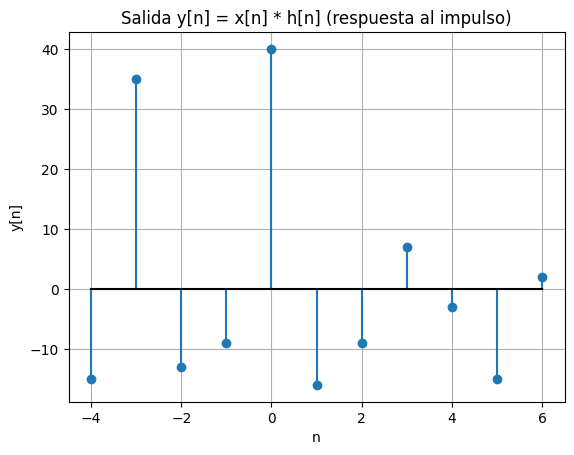

y[n] = [-15  35 -13  -9  40 -16  -9   7  -3 -15   2]
n ∈ [np.int64(-4), np.int64(-3), np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n] y respuesta al impulso h[n]
x = np.array([-15, 5, -3, 0, 5, 7, -1])     # n = -2 a 4
h = np.array([1, -2, 0, 1, -2])             # n = -2 a 2

# Convolución
y = np.convolve(x, h)
n_y = np.arange(-4, 7)

# Graficar
plt.stem(n_y, y, basefmt="k")
plt.title("Salida y[n] = x[n] * h[n] (respuesta al impulso)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

# Mostrar resultado
print(f"y[n] = {y}")
print(f"n ∈ {list(n_y)}")


Convolución con la respuesta al escalón

Datos

$h_\epsilon[n] = \{-1,\ 6,\ -10,\ 3,\ 1,\ -10,\ 2,\ 5\}$

El centro (†) está en el valor 3, posición 3 $\Rightarrow$ entonces:

$$
h_\epsilon[n] \text{ va de } n = -3 \text{ a } n = 4
$$

---

Fundamento teórico:

La salida de un sistema SLIT también puede calcularse como:

$$
y[n] = \frac{d}{dn}x[n] * h_\epsilon[n] = \Delta x[n] * h_\epsilon[n]
$$

Donde:

$$
\Delta x[n] = x[n] - x[n - 1]
$$

es la **derivada discreta hacia atrás**.

---

La **respuesta al impulso** se puede obtener como:

$$
h[n] = \Delta h_\epsilon[n] = h_\epsilon[n] - h_\epsilon[n - 1]
$$


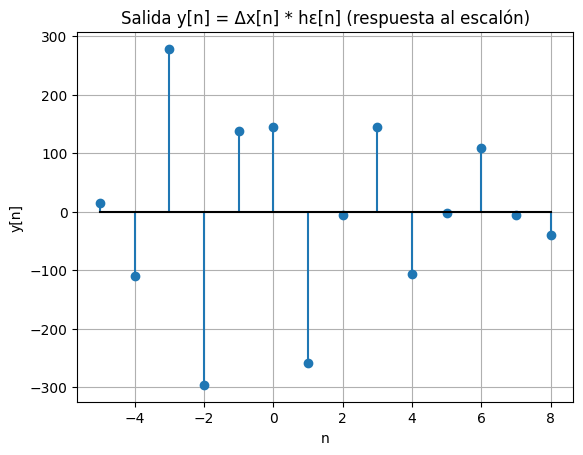

y[n] con h_ε[n] = [  15 -110  278 -296  138  144 -259   -5  145 -106   -3  109   -6  -40]
n ∈ [np.int64(-5), np.int64(-4), np.int64(-3), np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n]
x = np.array([-15, 5, -3, 0, 5, 7, -1])     # n = -2 a 4

# Respuesta al escalón
h_e = np.array([-1, 6, -10, 3, 1, -10, 2, 5])  # n = -3 a 4

# Derivada discreta hacia atrás de x[n]
x_pad = np.concatenate([[0], x])   # padding: x[-1] = 0
dx = x_pad[1:] - x_pad[:-1]        # Delta x[n]

# Convolución con respuesta al escalón
y_e = np.convolve(dx, h_e)
n_ye = np.arange(-5, 9)  # 14 muestras, desde -5 hasta 8

# Graficar
plt.stem(n_ye, y_e, basefmt="k")
plt.title("Salida y[n] = Δx[n] * hε[n] (respuesta al escalón)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

print(f"y[n] con h_ε[n] = {y_e}")
print(f"n ∈ {list(n_ye)}")


### *Sea la señal Gaussiana $x(t) = e^{-a t^2}$ con $a \in \mathbb{R}^+$, el sistema $A$ con relación entrada-salida $y_A(t) = x^2(t)$, y el sistema lineal e invariante con el tiempo $B$ con respuesta al impulso $h_B(t) = B e^{-b t^2}$: a) Encuentre la salida del sistema en serie $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$ b) Encuentre la salida del sistema en serie $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$


* Entrada: señal Gaussiana  
  $$
  x(t) = e^{-a t^2}, \quad a > 0
  $$

* Sistema **A**: no lineal  
  $$
  y_A(t) = x^2(t)
  $$

* Sistema **B**: **lineal e invariante en el tiempo (SLIT)**, con respuesta al impulso:  
  $$
  h_B(t) = B e^{-b t^2}, \quad b > 0, \ B \in \mathbb{R}
  $$
---
a) Salida del sistema: $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

**Primero:** pasa por el sistema **B** (SLIT), es decir:  
$$
y_B(t) = x(t) * h_B(t) = \int_{-\infty}^{\infty} x(\tau) h_B(t - \tau) d\tau
$$

Usamos:  
$x(\tau) = e^{-a \tau^2}$  
$h_B(t - \tau) = B e^{-b (t - \tau)^2}$

Entonces:  
$$
y_B(t) = \int_{-\infty}^{\infty} e^{-a \tau^2} \cdot B e^{-b (t - \tau)^2} d\tau = B \int_{-\infty}^{\infty} e^{-a \tau^2 - b(t - \tau)^2} d\tau
$$

Agrupamos los exponentes. Expandimos $(t - \tau)^2$:  
$$
(t - \tau)^2 = t^2 - 2t\tau + \tau^2
\Rightarrow
-a\tau^2 - b(t^2 - 2t\tau + \tau^2) = -(a + b)\tau^2 + 2bt\tau - bt^2
$$

Entonces:  
$$
y_B(t) = B e^{-bt^2} \int_{-\infty}^{\infty} e^{-(a + b)\tau^2 + 2bt\tau} d\tau
$$

Usamos la fórmula del **completado de cuadrados** para resolver la integral Gaussiana:  
$$
\int_{-\infty}^\infty e^{-p\tau^2 + q\tau} d\tau = \sqrt{\frac{\pi}{p}} e^{\frac{q^2}{4p}}, \quad \text{si } p > 0
$$

Aquí:  
$p = a + b$  
$q = 2bt$

Entonces:  
$$
y_B(t) = B e^{-bt^2} \cdot \sqrt{\frac{\pi}{a + b}} \cdot e^{\frac{(2bt)^2}{4(a + b)}}
= B \sqrt{\frac{\pi}{a + b}} e^{-bt^2} e^{\frac{4b^2t^2}{4(a + b)}}
= B \sqrt{\frac{\pi}{a + b}} e^{\left(-bt^2 + \frac{b^2t^2}{a + b}\right)}
$$

Simplificamos el exponente:  
$$
-bt^2 + \frac{b^2t^2}{a + b} = t^2\left( -b + \frac{b^2}{a + b} \right)
= t^2 \cdot \left( \frac{-b(a + b) + b^2}{a + b} \right)
= t^2 \cdot \left( \frac{-ab}{a + b} \right)
$$

Entonces:  
$$
y_B(t) = B \sqrt{\frac{\pi}{a + b}} \cdot e^{-\frac{ab}{a + b} t^2}
$$

Ahora pasa por el sistema A (cuadrático):
$$
y(t) = [y_B(t)]^2 = B^2 \cdot \frac{\pi}{a + b} \cdot e^{-2\cdot\frac{ab}{a + b} t^2}
$$

Resultado (parte a):
$$
{
y(t) = B^2 \cdot \frac{\pi}{a + b} \cdot e^{-\frac{2ab}{a + b} t^2}
}
$$

---

b) Salida del sistema: $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

Primero pasa por sistema A:
$$
y_A(t) = x^2(t) = \left(e^{-a t^2}\right)^2 = e^{-2a t^2}
$$

Ahora pasa por sistema B (convolución):
$$
y(t) = y_A(t) * h_B(t) = \int_{-\infty}^{\infty} e^{-2a \tau^2} \cdot B e^{-b(t - \tau)^2} d\tau
$$

Sigue el mismo procedimiento que en el inciso anterior. Expandimos:  
$$
b(t - \tau)^2 = bt^2 - 2bt\tau + b\tau^2
\Rightarrow \text{Exponente: } -2a\tau^2 - b(t - \tau)^2 = -(2a + b)\tau^2 + 2bt\tau - bt^2
$$

Entonces:  
$$
y(t) = B e^{-bt^2} \int_{-\infty}^{\infty} e^{-(2a + b)\tau^2 + 2bt\tau} d\tau
= B e^{-bt^2} \cdot \sqrt{\frac{\pi}{2a + b}} \cdot e^{\frac{b^2 t^2}{2a + b}}
$$

Juntamos los exponentes:  
$$
y(t) = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{t^2 \left( -b + \frac{b^2}{2a + b} \right)}
$$

Simplificamos:  
$$
-b + \frac{b^2}{2a + b} = \frac{-b(2a + b) + b^2}{2a + b} = \frac{-2ab}{2a + b}
$$

Entonces:  
$$
y(t) = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab}{2a + b} t^2}
$$

Resultado (parte b):
$$
{
y(t) = B \cdot \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab}{2a + b} t^2}
}
$$


### *Consultar y realizar los ejercicios del cuaderno Definición transformada de la Laplace

link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/Definicion_Laplace.ipynb

### * Consultar y realizar los ejercicios del cuaderno Propiedades básicas transformada de la Laplace

link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/Propiedades_Laplace.ipynb

### * Demuestre las siguientes propiedades (sin utilizar tablas de propiedades: (Ver material de apoyo y propiedades de Laplace.)


i) $$\mathcal{L}\{x(t - t_0)\} = e^{-s t_0} X(s)$$

**Demostración:**

La definición bilateral de la transformada de Laplace es:

$$
\mathcal{L}\{x(t - t_0)\} = \int_{-\infty}^{\infty} x(t - t_0) e^{-s t} dt
$$

Cambio de variable:

$$
\tau = t - t_0 \Rightarrow t = \tau + t_0,\quad dt = d\tau
$$

Sustituimos:

$$
\mathcal{L}\{x(t - t_0)\} = \int_{-\infty}^{\infty} x(\tau) e^{-s (\tau + t_0)} d\tau = e^{-s t_0} \int_{-\infty}^{\infty} x(\tau) e^{-s \tau} d\tau = e^{-s t_0} X(s)
$$

ii) $$\mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left(\frac{s}{a}\right)$$


**Demostración:**

$$
\mathcal{L}\{x(at)\} = \int_{-\infty}^{\infty} x(at) e^{-s t} dt
$$

Cambio de variable:

$$
\tau = at \Rightarrow t = \frac{\tau}{a}, \quad dt = \frac{d\tau}{a}
$$

Entonces:

$$
\mathcal{L}\{x(at)\} = \int_{-\infty}^{\infty} x(\tau) e^{-s \frac{\tau}{a}} \frac{d\tau}{a} = \frac{1}{|a|} \int_{-\infty}^{\infty} x(\tau) e^{-\frac{s}{a} \tau} d\tau = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$$


iii) $$\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = s X(s)$$

**Demostración:**

Usamos integración por partes:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = \int_{-\infty}^{\infty} \frac{dx(t)}{dt} e^{-st} dt
$$

Sea:

- $u = e^{-st} \Rightarrow du = -s e^{-st} dt$
- $dv = \frac{dx(t)}{dt} dt \Rightarrow v = x(t)$

Entonces:

$$
\int \frac{dx(t)}{dt} e^{-st} dt = x(t) e^{-st} \Big|_{-\infty}^{\infty} + s \int x(t) e^{-st} dt
$$

Si $x(t) e^{-st} \to 0$ en los extremos:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = s X(s)
$$

iv) $$\mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s)$$

**Demostracion:**


$$
x(t) * y(t) = \int_{-\infty}^{\infty} x(\tau) y(t - \tau) d\tau
$$

Aplicamos Laplace:

$$
\mathcal{L}\left\{ \int_{-\infty}^{\infty} x(\tau) y(t - \tau) d\tau \right\} = \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} x(\tau) y(t - \tau) d\tau \right) e^{-s t} dt
$$

Intercambiamos el orden de integración:

$$
= \int_{-\infty}^{\infty} x(\tau) \left( \int_{-\infty}^{\infty} y(t - \tau) e^{-s t} dt \right) d\tau
$$

Cambio de variable: $u = t - \tau \Rightarrow t = u + \tau$

$$
= \int_{-\infty}^{\infty} x(\tau) \left( \int_{-\infty}^{\infty} y(u) e^{-s (u + \tau)} du \right) d\tau = \int_{-\infty}^{\infty} x(\tau) e^{-s \tau} d\tau \cdot \int_{-\infty}^{\infty} y(u) e^{-s u} du
$$

$$
= X(s) \cdot Y(s)
$$




### * Encuentre la transformada de Laplace, dibuje el esquema de polos y ceros y la región de convergencia (ROC), de las siguientes señales:

i) $e^{-2t} u(t) + e^{-3t} u(t)$

Ambas son señales causales (multiplicadas por $u(t)$).

Transformadas individuales:

- $\mathcal{L}\{e^{-2t} u(t)\} = \dfrac{1}{s + 2}, \quad \text{ROC: } \Re\{s\} > -2$
- $\mathcal{L}\{e^{-3t} u(t)\} = \dfrac{1}{s + 3}, \quad \text{ROC: } \Re\{s\} > -3$

Transformada total:

$$
X(s) = \frac{1}{s + 2} + \frac{1}{s + 3}
$$

ROC: intersección de las dos → $\Re\{s\} > -2$

- Polos: $s = -2$ y $s = -3$
- Ceros: ninguno explícito
- ROC: parte derecha del polo más a la derecha → $\Re\{s\} > -2$
---

ii) $e^{2t} u(t) + e^{-3t} u(-t)$

Esta señal tiene una parte causal y otra anticausal.

Primera parte:

- $\mathcal{L}\{e^{2t} u(t)\} = \dfrac{1}{s - 2}, \quad \text{ROC: } \Re\{s\} > 2$

Segunda parte:

- $\mathcal{L}\{e^{-3t} u(-t)\} = \dfrac{1}{s + 3}, \quad \text{ROC: } \Re\{s\} < -3$

Transformada total:

$$
X(s) = \frac{1}{s - 2} + \frac{1}{s + 3}
$$

ROC: no existe ROC común → no existe transformada bilateral con ROC no vacía

Conclusión: no existe $X(s)$ bilateral válida. Solo se puede definir unilateralmente si $t \geq 0$.

---

iii) $e^{-a|t|}$

Esta función es par, y se puede escribir como:

$$
x(t) = e^{-a t} u(t) + e^{a t} u(-t)
$$

Transformadas:

- $e^{-a t} u(t) \rightarrow \dfrac{1}{s + a}, \quad \Re\{s\} > -a$
- $e^{a t} u(-t) \rightarrow \dfrac{1}{s - a}, \quad \Re\{s\} < a$

Transformada total:

$$
X(s) = \frac{1}{s + a} + \frac{1}{s - a}
$$

ROC: $\Re\{s\} \in (-a, a)$

- Polos: $s = -a$ y $s = a$
----

iv) $e^{-2t}[u(t) - u(t - 5)]$

Esto es una exponencial truncada entre $t = 0$ y $t = 5$:

$$
x(t) =
\begin{cases}
e^{-2t}, & 0 \leq t < 5 \\
0, & \text{en otro caso}
\end{cases}
$$

Transformada de Laplace (usando definición):

$$
X(s) = \int_0^5 e^{-2t} \cdot e^{-s t} dt = \int_0^5 e^{-(s + 2)t} dt
$$

Integrando:

$$
X(s) = \left[ \frac{e^{-(s + 2)t}}{-(s + 2)} \right]_0^5 = \frac{1 - e^{-5(s + 2)}}{s + 2}
$$

ROC: toda la recta compleja → $\Re\{s\} \in \mathbb{R}$

- Polos: $s = -2$
- Ceros: cuando $1 - e^{-5(s + 2)} = 0 \Rightarrow s = -2 + \dfrac{2\pi j n}{5}, \quad n \in \mathbb{Z}$



 ### * Consultar y realizar los ejercicios del cuaderno Transformada inversa de Laplace.

 link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/inverse_Laplace.ipynb


### * Consultar y realizar los ejercicios del cuaderno Autofunciones y SLITs.

link: https://github.com/laduqueo/Senales_y_Sistemas/blob/main/Autofunciones.ipynb

### *Encuentre la funcion de transferencia en lazo abierto para un circuito RLC serie (entrada tension de alimentación - salida tension en el capacitor) y un circuito RCL en paralelo (entrada corriente de alimentacion - salida corriente en el inductor). Nota: tenga en cuenta las condiciones iniciales del sistema segun lo explicado en el material de apoyo Circuito RLC y Analisis de redes eléctricas.

1. Circuito RLC serie (Entrada: tensión de alimentación | Salida: tensión en el capacitor)

a) Ecuación diferencial del RLC serie:

Aplicando la Ley de voltajes de Kirchhoff (LVK):

$$L \cdot C \cdot \frac{d^2 y(t)}{dt^2} + R \cdot C \cdot \frac{dy(t)}{dt} + y(t) = x(t)$$

Donde:

$x(t)$: Voltaje de entrada  

$y(t)$: Voltaje en el capacitor (salida)  

Asumiendo condiciones iniciales cero (sin energía almacenada antes de $t=0$).

b) Función de transferencia (Laplace):

Llevando a Laplace (con condiciones iniciales cero):

$$L \cdot C \cdot s^2 \cdot Y(s) + R \cdot C \cdot s \cdot Y(s) + Y(s) = X(s)$$

Factorizando:

$$Y(s) \left( L C s^2 + R C s + 1 \right) = X(s)$$

Entonces:

$$H_{\text{serie}}(s) = \frac{Y(s)}{X(s)} = \frac{1}{L C s^2 + R C s + 1}$$

Resultado final del RLC serie (Tensión de entrada → Tensión en el capacitor):

$$H_{\text{serie}}(s) = \frac{1}{L C s^2 + R C s + 1}$$

---

2. Circuito RCL en paralelo (Entrada: corriente de alimentación | Salida: corriente en el inductor)

a) Ecuación diferencial del RCL paralelo:

Aplicando la Ley de corrientes de Kirchhoff (LCK):

$$i_{\text{in}}(t) = i_R(t) + i_L(t) + i_C(t)$$

Expresando en términos de $y(t)$, que será la corriente en el inductor:

- Corriente en el resistor: $$i_R(t) = \frac{v(t)}{R}$$

- Corriente en el inductor: $$y(t) = i_L(t)$$

- Corriente en el capacitor: $$i_C(t) = C \cdot \frac{dv(t)}{dt}$$

Y como $$v(t) = L \cdot \frac{dy(t)}{dt}$$

Entonces:

$$i_R(t) = \frac{L}{R} \cdot \frac{dy(t)}{dt}$$

$$i_C(t) = C \cdot \frac{d}{dt} \left( L \cdot \frac{dy(t)}{dt} \right) = L C \cdot \frac{d^2 y(t)}{dt^2}$$

Sustituyendo en la ecuación general:

$$x(t) = \frac{L}{R} \cdot \frac{dy(t)}{dt} + y(t) + L C \cdot \frac{d^2 y(t)}{dt^2}$$

Multiplicando todo por $R$:

$$L C R \cdot \frac{d^2 y(t)}{dt^2} + L \cdot \frac{dy(t)}{dt} + R \cdot y(t) = R \cdot x(t)$$

b) Función de transferencia (Laplace):

Con condiciones iniciales cero:

$$L C R \cdot s^2 Y(s) + L \cdot s Y(s) + R \cdot Y(s) = R \cdot X(s)$$

Factorizando $Y(s)$:

$$Y(s) \left( L C R \cdot s^2 + L \cdot s + R \right) = R \cdot X(s)$$

Entonces:

$$H(s) = \frac{Y(s)}{X(s)} = \frac{R}{L C R \cdot s^2 + L \cdot s + R}$$

Dividiendo numerador y denominador entre $R$:

$$H_{\text{paralelo}}(s) = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$$

Resultado final del RCL paralelo (Corriente de entrada → Corriente en el inductor):

$$H_{\text{paralelo}}(s) = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$$


### *Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresion de la salida en el tiempo para una configuracion en lazo cerrado del sistema, en funcion de R, L y C, para las siguientes entradas: i) impulso, ii) escalon unitario, y iv) rampa. Compruebe los resultados en simulacion sobre Python (utililzando sympy) y grafique la senal de salida para cada caso. Ver cuaderno de ayuda Fracciones parciales Circuito RLC.

1. Función de transferencia en lazo cerrado

Si la función de transferencia en lazo abierto es:

$$H(s) = \frac{1}{L C s^2 + R C s + 1}$$

Entonces, el lazo cerrado es:

$$H_{\text{lc}}(s) = \frac{H(s)}{1 + H(s)} = \frac{1}{L C s^2 + R C s + 2}$$

Notas: Esto sale directamente del esquema de retroalimentación unitaria:

$$H_{\text{lc}}(s) = \frac{H(s)}{1 + H(s)}$$

El denominador se convierte en:

$$L C s^2 + R C s + 1 + 1 = L C s^2 + R C s + 2$$

---

2. Salidas en Laplace y luego en el tiempo

Para cada entrada, el procedimiento es:

Entrada en Laplace:

- Impulso: $X(s) = 1$

- scalón: $X(s) = \frac{1}{s}$

- Rampa: $X(s) = \frac{1}{s^2}$

La salida será:

$$Y(s) = H_{\text{lc}}(s) \cdot X(s)$$

Luego, aplicar descomposición en fracciones parciales y finalmente la transformada inversa de Laplace para obtener $y(t)$.


                  1         
H_lc(s) = ──────────────────
               2            
          C⋅L⋅s  + C⋅R⋅s + 2


### Entrada: Impulso ###


               1         
Y(s) = ──────────────────
            2            
       C⋅L⋅s  + C⋅R⋅s + 2

                1         
Yₚ(s) = ──────────────────
             2            
        C⋅L⋅s  + C⋅R⋅s + 2

y(t) = 0


### Entrada: Escalon ###


                 1           
Y(s) = ──────────────────────
         ⎛     2            ⎞
       s⋅⎝C⋅L⋅s  + C⋅R⋅s + 2⎠

               C⋅(L⋅s + R)          1 
Yₚ(s) = - ────────────────────── + ───
            ⎛     2            ⎞   2⋅s
          2⋅⎝C⋅L⋅s  + C⋅R⋅s + 2⎠      

           ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________ ↪
           ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2        ↪
           ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 8⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 8⋅L  ↪
           ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜─────────────────── ↪
           ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L        ↪
         C⋅⎜─────────────────────────────── + ──────────────────────────────── ↪
           ⎜               C                              ______________       ↪
           ⎜                                             ╱      2              ↪
           ⎝                                        √C⋅╲╱  - C⋅R  + 8⋅L        ↪
y(t) = - ───────────────────────────────────────────────────────────────────── ↪
                                            2                                  ↪

↪ ⎞⎞    
↪ ⎟⎟    
↪ ⎟⎟    
↪ ⎟⎟    
↪ ⎠⎟    
↪ ─⎟    
↪  ⎟    
↪  ⎟    
↪  ⎠   1
↪ ── + ─
↪      2


### Entrada: Rampa ###


                  1           
Y(s) = ───────────────────────
        2 ⎛     2            ⎞
       s ⋅⎝C⋅L⋅s  + C⋅R⋅s + 2⎠

                  ⎛             2      ⎞       
          C⋅R   C⋅⎝C⋅L⋅R⋅s + C⋅R  - 2⋅L⎠    1  
Yₚ(s) = - ─── + ──────────────────────── + ────
          4⋅s      ⎛     2            ⎞       2
                 4⋅⎝C⋅L⋅s  + C⋅R⋅s + 2⎠    2⋅s 

                 ⎛                             -R⋅t     ⎛     ______________⎞  ↪
                 ⎜       ⎛   2       2      ⎞  ─────    ⎜    ╱      2       ⎟  ↪
                 ⎜       ⎜  R     C⋅R  - 2⋅L⎟   2⋅L     ⎜t⋅╲╱  - C⋅R  + 8⋅L ⎟  ↪
                 ⎜2⋅√C⋅L⋅⎜- ─── + ──────────⎟⋅ℯ     ⋅sin⎜───────────────────⎟  ↪
                 ⎜       ⎝  2⋅L      C⋅L    ⎠           ⎝      2⋅√C⋅L       ⎠  ↪
               C⋅⎜───────────────────────────────────────────────────────────  ↪
                 ⎜                        ______________                       ↪
                 ⎜                       ╱      2                              ↪
         C⋅R     ⎝                     ╲╱  - C⋅R  + 8⋅L                        ↪
y(t) = - ─── + ─────────────────────────────────────────────────────────────── ↪
          4                                                     4              ↪

↪                                    ⎞    
↪                                    ⎟    
↪      -R⋅t     ⎛     

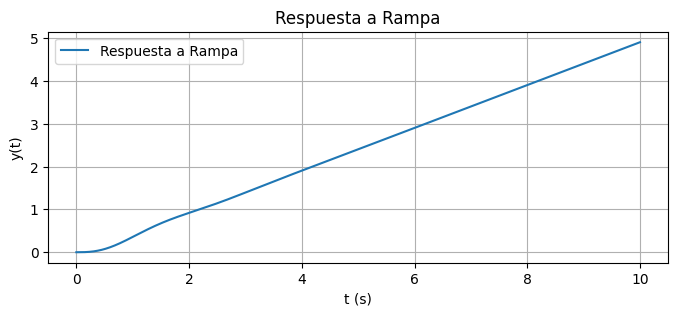

In [6]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# Inicialización de impresión simbólica
sym.init_printing()

# Variables simbólicas
s, t, R, L, C = sym.symbols('s t R L C', positive=True)

# Definición simbólica de la función de transferencia lazo abierto
H_abierto = 1 / (L*C*s**2 + R*C*s + 1)

# Función de transferencia en lazo cerrado: Hlc = H / (1 + H)
H_lc_expr = sym.simplify(H_abierto / (1 + H_abierto))
display(sym.Eq(sym.Function('H_lc')(s), H_lc_expr))

# Entradas en el dominio de Laplace
entradas = {
    'Impulso': 1,
    'Escalon': 1/s,
    'Rampa': 1/s**2
}

# Valores numéricos para RLC
RLC = {R: 1, L: 0.5, C: 0.4}

# Loop para cada entrada
for tipo, X in entradas.items():
    print(f'\n### Entrada: {tipo} ###')

    # Salida en Laplace
    Y = sym.simplify(H_lc_expr * X)
    display(sym.Eq(sym.Function('Y')(s), Y))

    # Fracciones parciales
    Yp = sym.apart(Y, s)
    display(sym.Eq(sym.Function('Y_p')(s), Yp))

    # Transformada inversa de Laplace
    yt = 0
    for j, term in enumerate(Yp.args if Yp.has(sym.Add) else [Yp]):
        yt += sym.inverse_laplace_transform(term, s, t)
    display(sym.Eq(sym.Function('y')(t), yt))

    # Sustitución numérica de R, L, C
    yt_num = yt.subs(RLC)

f_lambdified = sym.lambdify(t, yt_num, modules='numpy')
tt = np.linspace(0, 10, 1000)
yy = f_lambdified(tt)

# Si yy es escalar, convertirlo en array del mismo tamaño que tt
if np.isscalar(yy):
    yy = np.full_like(tt, yy)

plt.figure(figsize=(8, 3))
plt.plot(tt, yy, label=f'Respuesta a {tipo}')
plt.xlabel('t (s)')
plt.ylabel('y(t)')
plt.title(f'Respuesta a {tipo}')
plt.grid(True)
plt.legend()
plt.show()

